# Import_Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading The Data:

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\Data_Science_Jupyter\Project_1_digi_crome_capstone\Data\features_Property_data.csv")

In [3]:
df.head(5)

,Unnamed: 0,PropertyID,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,...,SaleCondn_Alloca,SaleCondn_Family,SaleCondn_Normal,SaleCondn_Partial,AgeAtSale,YearsSinceRemodel,TotalSqFootage,TotalBathrooms,QualityScore,GrLivArea_OverallQual
0,0,1,60,65,8450,7,5,2003,2003,196,...,False,False,True,False,5,5,1860,3.5,35,11970
1,1,2,20,80,9600,6,8,1976,1976,0,...,False,False,True,False,31,31,1546,2.5,48,7572
2,2,3,60,68,11250,7,5,2001,2002,162,...,False,False,True,False,7,6,2220,3.5,35,12502
3,3,4,70,60,9550,7,5,1915,1970,0,...,False,False,False,False,91,36,2257,2.0,35,12019
4,4,5,60,84,14260,8,5,2000,2000,350,...,False,False,True,False,8,8,2688,3.5,40,17584


In [4]:
df.shape

(1398, 269)

# Model Selection

In [5]:
X=df.drop('PropPrice',axis=1)
Y=df [['PropPrice']]

# Split the Data

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Standard Scaler

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Train and Evaluate Models

# Linear Regression

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, Y_train)
lr_y_pred = lr_model.predict(X_test_scaled)

In [10]:
score = r2_score(Y_test, lr_y_pred)
print(f'Model r2 score: {score}')

Model r2 score: 0.7022883151972155


# Decision Tree

In [11]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, Y_train)
dt_y_pred = dt_model.predict(X_test_scaled)

In [12]:
score = r2_score(Y_test, dt_y_pred)
print(f'Model r2 score: {score}')

Model r2 score: 0.7805370006985088


# Random Forest

In [13]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, Y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

In [14]:
score = r2_score(Y_test, rf_y_pred)
print(f'Model r2 score: {score}')

Model r2 score: 0.8878674078712793


# Gradient Boosting Regressor Model

In [15]:
gr_model = GradientBoostingRegressor()
gr_model.fit(X_train_scaled, Y_train)
gb_y_pred = gr_model.predict(X_test_scaled)

In [16]:
score = r2_score(Y_test, gb_y_pred)
print(f'Model r2 score: {score}')

Model r2 score: 0.8873736336331552


# applying PCA

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [18]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)

In [19]:
# Retain 95% of the variance
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(scaled_features)

In [20]:
df_pca

array([[ 2.22954489,  0.25459949,  0.25501157, ...,  0.028103  ,
         0.06183016,  0.07327129],
       [-0.35252021, -0.94613864,  0.08574419, ..., -0.35951464,
        -0.12030865,  0.01237044],
       [ 2.56133419, -0.30544483,  0.8120066 , ..., -0.0464842 ,
         0.07290669,  0.09160887],
       ...,
       [ 0.46852498,  0.10907862,  0.76817361, ...,  0.17540635,
        -0.14329802,  0.15848232],
       [-0.92982836, -0.68459857, -1.09227597, ...,  0.02850718,
        -0.08606299, -0.05980337],
       [-0.86950904, -0.77671794, -0.3753084 , ..., -0.06089222,
        -0.14555083, -0.18877935]])

In [21]:
df_pca.shape

(1398, 99)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df_pca,Y,test_size=0.3,random_state=42)

# After PCA Standard Scaler

In [23]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# After PCA Linear Regression

In [24]:
pca_lr_model = LinearRegression()
pca_lr_model.fit(x_train_scaled, y_train)
lr_y_pred1 = pca_lr_model.predict(x_test_scaled)

In [25]:
score = r2_score(y_test, lr_y_pred1)
print(f'Model r2 score: {score}')

Model r2 score: 0.8789528496823249


# After PCA Decision Tree

In [26]:
pca_dt_model = DecisionTreeRegressor(random_state=42)
pca_dt_model.fit(x_train_scaled, y_train)
dt_y_pred2 = pca_dt_model.predict(x_test_scaled)

In [27]:
score = r2_score(y_test, dt_y_pred2)
print(f'Model r2 score: {score}')

Model r2 score: 0.5334897706491102


# After PCA Random Forest

In [28]:
pca_rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
pca_rf_model.fit(x_train_scaled, y_train)
rf_y_pred3 = pca_rf_model.predict(x_test_scaled)

In [29]:
score = r2_score(y_test, rf_y_pred3)
print(f'Model r2 score: {score}')

Model r2 score: 0.7705193516384887


# After PCA Gradient Boosting Regressor 

In [30]:
pca_gr_model = GradientBoostingRegressor()
pca_gr_model.fit(x_train_scaled, y_train)
gb_y_pred4 = pca_gr_model.predict(x_test_scaled)

In [31]:
score = r2_score(y_test, gb_y_pred4)
print(f'Model r2 score: {score}')

Model r2 score: 0.8226519646310309


# Visualize Model Performance

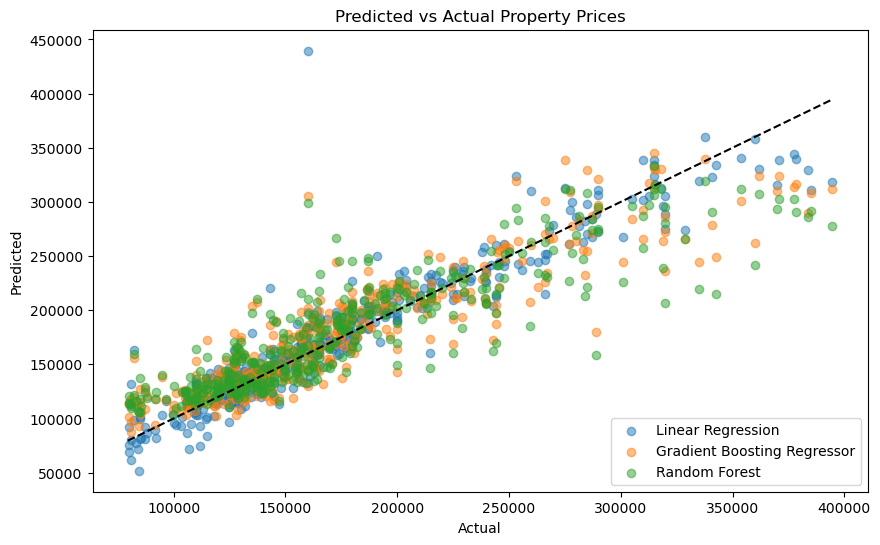

In [32]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, lr_y_pred1, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, gb_y_pred4, label='Gradient Boosting Regressor', alpha=0.5)
plt.scatter(y_test, rf_y_pred3, label='Random Forest', alpha=0.5)

plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--k')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Property Prices')
plt.legend()
plt.show()

# Evaluate each model using MAE and RMSE.

In [33]:
#Linear Regression Metrics
mae_linear = mean_absolute_error(y_test, lr_y_pred1)
rmse_linear = np.sqrt(mean_squared_error(y_test, lr_y_pred1))
print(f"Linear Regression - MAE: {mae_linear}, RMSE: {rmse_linear}")

Linear Regression - MAE: 13783.4475552918, RMSE: 22858.255509347036


In [34]:
#Random Forest Metrics
mae_forest = mean_absolute_error(y_test, rf_y_pred3)
rmse_forest = np.sqrt(mean_squared_error(y_test, rf_y_pred3))
print(f"Random Forest - MAE: {mae_forest}, RMSE: {rmse_forest}")

Random Forest - MAE: 21842.22792857143, RMSE: 31473.05003518205


In [35]:
#Gradient Boosting Regressor Metrics
mae_gradient = mean_absolute_error(y_test, gb_y_pred4)
rmse_gradient = np.sqrt(mean_squared_error(y_test, gb_y_pred4))
print(f"Random Forest - MAE: {mae_gradient}, RMSE: {rmse_gradient}")

Random Forest - MAE: 19815.468931849897, RMSE: 27668.07784804604


# Compare and Select the Best Model

In [36]:
# Print the metrics for comparison

print("Model Evaluation Results:")
print(f"Linear Regression - MAE: {mae_linear:.4f}, RMSE: {rmse_linear:.4f}")
print(f"Random Forest - MAE: {mae_forest:.4f}, RMSE: {rmse_forest:.4f}")
print(f"Gradient Boosting - MAE: {mae_gradient:.4f}, RMSE: {rmse_gradient:.4f}")

# Determine the best model
models = {
    "Linear Regression": {"MAE": mae_linear, "RMSE": rmse_linear},
    "Random Forest": {"MAE": mae_forest, "RMSE": rmse_forest},
    "Gradient Boosting": {"MAE": mae_gradient, "RMSE": rmse_gradient}
}

best_model = min(models, key=lambda x: models[x]["RMSE"])
print(f"The best model is: {best_model}")

Model Evaluation Results:
Linear Regression - MAE: 13783.4476, RMSE: 22858.2555
Random Forest - MAE: 21842.2279, RMSE: 31473.0500
Gradient Boosting - MAE: 19815.4689, RMSE: 27668.0778
The best model is: Linear Regression


# Conclusion

This process allows you to:

1. Load and prepare your data.
2. Split your data into training and testing sets.
3. Train different machine learning models.
4. Evaluate their performance using mean squared error (MSE) and R2 score.
5. Use cross-validation for more reliable performance estimates.
6. Visualize the results to compare actual vs. predicted property prices.